In [ ]:
#(DESCRIPTION

You've been asked to perform data analysis of service request (311) calls from New York City. You've also been asked to utilize data wrangling techniques to understand the pattern in the data and visualize the major types of complaints.

 

Note: Download 311-service-requests-nyc.zip file using the link given in the Customer Service Requests Analysis project problem statement and extract the 311_Service_Requests_from_2010_to_Present.csv file

 

Perform the following steps:

Understand the dataset:
Identify the shape of the dataset
Identify variables with null values
2. Perform basic data exploratory analysis:

Utilize missing value treatment
Analyze the date column and remove the entries if it has an incorrect timeline
Draw a frequency plot for city-wise complaints
Draw scatter and hexbin plots for complaint concentration across Brooklyn
3. Find major types of complaints:

Plot a bar graph of count vs. complaint types
Find the top 10 types of complaints
Display the types of complaints in each city in a separate dataset
 

4. Visualize the major types of complaints in each city

5. Check if the average response time across various types of complaints

6. Identify significant variables by performing a statistical analysis using p-values and chi-square values (Optional)

In [117]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
df=pd.read_csv("311_Service_Requests_from_2010_to_Present.csv",low_memory = False)

In [84]:
df.head()

,Unique Key,Created Date,Closed Date,Agency,Agency Name,Complaint Type,Descriptor,Location Type,Incident Zip,Incident Address,...,Bridge Highway Name,Bridge Highway Direction,Road Ramp,Bridge Highway Segment,Garage Lot Name,Ferry Direction,Ferry Terminal Name,Latitude,Longitude,Location
0,32310363,12/31/2015 11:59:45 PM,01/01/2016 12:55:15 AM,NYPD,New York City Police Department,Noise - Street/Sidewalk,Loud Music/Party,Street/Sidewalk,10034.0,71 VERMILYEA AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.865682,-73.923501,"(40.86568153633767, -73.92350095571744)"
1,32309934,12/31/2015 11:59:44 PM,01/01/2016 01:26:57 AM,NYPD,New York City Police Department,Blocked Driveway,No Access,Street/Sidewalk,11105.0,27-07 23 AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.775945,-73.915094,"(40.775945312321085, -73.91509393898605)"
2,32309159,12/31/2015 11:59:29 PM,01/01/2016 04:51:03 AM,NYPD,New York City Police Department,Blocked Driveway,No Access,Street/Sidewalk,10458.0,2897 VALENTINE AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.870325,-73.888525,"(40.870324522111424, -73.88852464418646)"
3,32305098,12/31/2015 11:57:46 PM,01/01/2016 07:43:13 AM,NYPD,New York City Police Department,Illegal Parking,Commercial Overnight Parking,Street/Sidewalk,10461.0,2940 BAISLEY AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.835994,-73.828379,"(40.83599404683083, -73.82837939584206)"
4,32306529,12/31/2015 11:56:58 PM,01/01/2016 03:24:42 AM,NYPD,New York City Police Department,Illegal Parking,Blocked Sidewalk,Street/Sidewalk,11373.0,87-14 57 ROAD,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.733060,-73.874170,"(40.733059618956815, -73.87416975810375)"


In [20]:
#shape of the dataframe
df.shape

(364558, 53)

In [85]:
df.columns

Index(['Unique Key', 'Created Date', 'Closed Date', 'Agency', 'Agency Name',
       'Complaint Type', 'Descriptor', 'Location Type', 'Incident Zip',
       'Incident Address', 'Street Name', 'Cross Street 1', 'Cross Street 2',
       'Intersection Street 1', 'Intersection Street 2', 'Address Type',
       'City', 'Landmark', 'Facility Type', 'Status', 'Due Date',
       'Resolution Description', 'Resolution Action Updated Date',
       'Community Board', 'Borough', 'X Coordinate (State Plane)',
       'Y Coordinate (State Plane)', 'Park Facility Name', 'Park Borough',
       'School Name', 'School Number', 'School Region', 'School Code',
       'School Phone Number', 'School Address', 'School City', 'School State',
       'School Zip', 'School Not Found', 'School or Citywide Complaint',
       'Vehicle Type', 'Taxi Company Borough', 'Taxi Pick Up Location',
       'Bridge Highway Name', 'Bridge Highway Direction', 'Road Ramp',
       'Bridge Highway Segment', 'Garage Lot Name', 'Ferry 

In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 364558 entries, 0 to 364557
Data columns (total 53 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   Unique Key                      364558 non-null  int64  
 1   Created Date                    364558 non-null  object 
 2   Closed Date                     362177 non-null  object 
 3   Agency                          364558 non-null  object 
 4   Agency Name                     364558 non-null  object 
 5   Complaint Type                  364558 non-null  object 
 6   Descriptor                      358057 non-null  object 
 7   Location Type                   364425 non-null  object 
 8   Incident Zip                    361560 non-null  float64
 9   Incident Address                312859 non-null  object 
 10  Street Name                     312859 non-null  object 
 11  Cross Street 1                  307370 non-null  object 
 12  Cross Street 2  

In [86]:
#variables with null values
df.isnull().sum()

Unique Key                             0
Created Date                           0
Closed Date                         2381
Agency                                 0
Agency Name                            0
Complaint Type                         0
Descriptor                          6501
Location Type                        133
Incident Zip                        2998
Incident Address                   51699
Street Name                        51699
Cross Street 1                     57188
Cross Street 2                     57805
Intersection Street 1             313438
Intersection Street 2             314046
Address Type                        3252
City                                2997
Landmark                          364183
Facility Type                       2389
Status                                 0
Due Date                               3
Resolution Description                 0
Resolution Action Updated Date      2402
Community Board                        0
Borough         

In [ ]:
#to check the percentage of the missing values


In [87]:
pd.DataFrame(df.isnull().sum()/df.shape[0]*100).sort_values(0,ascending=False)[:15]

,0
School or Citywide Complaint,100.000000
Vehicle Type,100.000000
Taxi Company Borough,100.000000
Taxi Pick Up Location,100.000000
Garage Lot Name,100.000000
Ferry Direction,99.999726
Ferry Terminal Name,99.999451
Road Ramp,99.928132
Bridge Highway Segment,99.928132
Bridge Highway Name,99.918531


In [ ]:
#to remove the column with very high percentage

In [88]:
missing_data = df.loc[:,(df.isnull().sum()/df.shape[0]*100)>=50]

In [5]:
missing_data

,Intersection Street 1,Intersection Street 2,Landmark,School or Citywide Complaint,Vehicle Type,Taxi Company Borough,Taxi Pick Up Location,Bridge Highway Name,Bridge Highway Direction,Road Ramp,Bridge Highway Segment,Garage Lot Name,Ferry Direction,Ferry Terminal Name
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
364553,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
364554,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
364555,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
364556,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [89]:
missing_col=missing_data.columns

In [7]:
missing_col

Index(['Intersection Street 1', 'Intersection Street 2', 'Landmark',
       'School or Citywide Complaint', 'Vehicle Type', 'Taxi Company Borough',
       'Taxi Pick Up Location', 'Bridge Highway Name',
       'Bridge Highway Direction', 'Road Ramp', 'Bridge Highway Segment',
       'Garage Lot Name', 'Ferry Direction', 'Ferry Terminal Name'],
      dtype='object')

In [90]:
df.drop(columns=missing_col,inplace=True)

In [13]:
df.shape

(364558, 39)

In [91]:
df.head()

,Unique Key,Created Date,Closed Date,Agency,Agency Name,Complaint Type,Descriptor,Location Type,Incident Zip,Incident Address,...,School Code,School Phone Number,School Address,School City,School State,School Zip,School Not Found,Latitude,Longitude,Location
0,32310363,12/31/2015 11:59:45 PM,01/01/2016 12:55:15 AM,NYPD,New York City Police Department,Noise - Street/Sidewalk,Loud Music/Party,Street/Sidewalk,10034.0,71 VERMILYEA AVENUE,...,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,N,40.865682,-73.923501,"(40.86568153633767, -73.92350095571744)"
1,32309934,12/31/2015 11:59:44 PM,01/01/2016 01:26:57 AM,NYPD,New York City Police Department,Blocked Driveway,No Access,Street/Sidewalk,11105.0,27-07 23 AVENUE,...,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,N,40.775945,-73.915094,"(40.775945312321085, -73.91509393898605)"
2,32309159,12/31/2015 11:59:29 PM,01/01/2016 04:51:03 AM,NYPD,New York City Police Department,Blocked Driveway,No Access,Street/Sidewalk,10458.0,2897 VALENTINE AVENUE,...,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,N,40.870325,-73.888525,"(40.870324522111424, -73.88852464418646)"
3,32305098,12/31/2015 11:57:46 PM,01/01/2016 07:43:13 AM,NYPD,New York City Police Department,Illegal Parking,Commercial Overnight Parking,Street/Sidewalk,10461.0,2940 BAISLEY AVENUE,...,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,N,40.835994,-73.828379,"(40.83599404683083, -73.82837939584206)"
4,32306529,12/31/2015 11:56:58 PM,01/01/2016 03:24:42 AM,NYPD,New York City Police Department,Illegal Parking,Blocked Sidewalk,Street/Sidewalk,11373.0,87-14 57 ROAD,...,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,N,40.733060,-73.874170,"(40.733059618956815, -73.87416975810375)"


In [ ]:
#droping irrelevant columns

In [92]:
drop_columns = ['Agency Name','Incident Address','Street Name','Cross Street 1','Cross Street 2','Address Type','Park Facility Name','Park Borough','School Name',
'School Number','School Region','School Code','School Phone Number','School Address','School City','School State','School Zip','School Not Found',
'X Coordinate (State Plane)','Y Coordinate (State Plane)','Due Date','Resolution Action Updated Date',
'Community Board','Facility Type','Location']

In [12]:
dataset = df.drop(drop_columns,axis=1)

In [93]:
dataset.head()

,Unique Key,Created Date,Closed Date,Agency,Complaint Type,Descriptor,Location Type,Incident Zip,Intersection Street 1,Intersection Street 2,...,Bridge Highway Name,Bridge Highway Direction,Road Ramp,Bridge Highway Segment,Garage Lot Name,Ferry Direction,Ferry Terminal Name,Latitude,Longitude,Request_Closing_Time
0,32310363,2015-12-31 23:59:45,2016-01-01 00:55:15,NYPD,Noise - Street/Sidewalk,Loud Music/Party,Street/Sidewalk,10034.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.865682,-73.923501,0 days 00:55:30
1,32309934,2015-12-31 23:59:44,2016-01-01 01:26:57,NYPD,Blocked Driveway,No Access,Street/Sidewalk,11105.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.775945,-73.915094,0 days 01:27:13
2,32309159,2015-12-31 23:59:29,2016-01-01 04:51:03,NYPD,Blocked Driveway,No Access,Street/Sidewalk,10458.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.870325,-73.888525,0 days 04:51:34
3,32305098,2015-12-31 23:57:46,2016-01-01 07:43:13,NYPD,Illegal Parking,Commercial Overnight Parking,Street/Sidewalk,10461.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.835994,-73.828379,0 days 07:45:27
4,32306529,2015-12-31 23:56:58,2016-01-01 03:24:42,NYPD,Illegal Parking,Blocked Sidewalk,Street/Sidewalk,11373.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.733060,-73.874170,0 days 03:27:44


In [42]:
dataset.shape

(364558, 14)

In [94]:
dataset['Status'].unique()

array(['Closed', 'Open', 'Assigned', 'Draft'], dtype=object)

In [48]:
dataset['Status'].value_counts()

Closed      362114
Open          1640
Assigned       802
Draft            2
Name: Status, dtype: int64

In [95]:
dataset.isnull().sum()

Unique Key                           0
Created Date                         0
Closed Date                       2381
Agency                               0
Complaint Type                       0
Descriptor                        6501
Location Type                      133
Incident Zip                      2998
Intersection Street 1           313438
Intersection Street 2           314046
City                              2997
Landmark                        364183
Status                               0
Resolution Description               0
Borough                              0
School or Citywide Complaint    364558
Vehicle Type                    364558
Taxi Company Borough            364558
Taxi Pick Up Location           364558
Bridge Highway Name             364261
Bridge Highway Direction        364261
Road Ramp                       364296
Bridge Highway Segment          364296
Garage Lot Name                 364558
Ferry Direction                 364557
Ferry Terminal Name      

In [53]:
dataset= dataset.dropna(subset=['Descriptor','Longitude','Latitude','Incident Zip','City','Closed Date','Location Type'])

In [96]:
dataset.isnull().sum()

Unique Key                           0
Created Date                         0
Closed Date                       2381
Agency                               0
Complaint Type                       0
Descriptor                        6501
Location Type                      133
Incident Zip                      2998
Intersection Street 1           313438
Intersection Street 2           314046
City                              2997
Landmark                        364183
Status                               0
Resolution Description               0
Borough                              0
School or Citywide Complaint    364558
Vehicle Type                    364558
Taxi Company Borough            364558
Taxi Pick Up Location           364558
Bridge Highway Name             364261
Bridge Highway Direction        364261
Road Ramp                       364296
Bridge Highway Segment          364296
Garage Lot Name                 364558
Ferry Direction                 364557
Ferry Terminal Name      

In [55]:
dataset.shape

(353891, 14)

In [97]:
#check diff types of complaints

In [57]:
dataset['Complaint Type'].unique()

array(['Noise - Street/Sidewalk', 'Blocked Driveway', 'Illegal Parking',
       'Derelict Vehicle', 'Noise - Commercial',
       'Noise - House of Worship', 'Posting Advertisement',
       'Noise - Vehicle', 'Animal Abuse', 'Vending', 'Traffic',
       'Drinking', 'Noise - Park', 'Graffiti', 'Disorderly Youth'],
      dtype=object)

In [98]:
dataset['Complaint Type'].value_counts()

Blocked Driveway             100881
Illegal Parking               92679
Noise - Street/Sidewalk       51692
Noise - Commercial            44109
Derelict Vehicle              21661
Noise - Vehicle               19352
Animal Abuse                  10541
Traffic                        5198
Homeless Encampment            4879
Vending                        4192
Noise - Park                   4109
Drinking                       1409
Noise - House of Worship       1070
Posting Advertisement           681
Urinating in Public             641
Bike/Roller/Skate Chronic       478
Panhandling                     327
Disorderly Youth                315
Illegal Fireworks               172
Graffiti                        157
Agency Issues                     8
Squeegee                          4
Ferry Complaint                   2
Animal in a Park                  1
Name: Complaint Type, dtype: int64

In [63]:
dataset.groupby(['City','Complaint Type']).size()

City      Complaint Type         
ARVERNE   Animal Abuse                46
          Blocked Driveway            50
          Derelict Vehicle            32
          Disorderly Youth             2
          Drinking                     1
                                    ... 
Woodside  Blocked Driveway            27
          Derelict Vehicle             8
          Illegal Parking            124
          Noise - Commercial           2
          Noise - Street/Sidewalk      5
Length: 629, dtype: int64

In [99]:
pd.DataFrame({'count':dataset.groupby(['City','Complaint Type']).size()}).reset_index

<bound method DataFrame.reset_index of                                   count
City     Complaint Type                
ARVERNE  Animal Abuse                46
         Blocked Driveway            50
         Derelict Vehicle            32
         Disorderly Youth             2
         Drinking                     1
...                                 ...
Woodside Blocked Driveway            27
         Derelict Vehicle             8
         Illegal Parking            124
         Noise - Commercial           2
         Noise - Street/Sidewalk      5

[777 rows x 1 columns]>

In [ ]:
#top 10 complaints

In [100]:

dataset['Complaint Type'].value_counts().head(10)

Blocked Driveway           100881
Illegal Parking             92679
Noise - Street/Sidewalk     51692
Noise - Commercial          44109
Derelict Vehicle            21661
Noise - Vehicle             19352
Animal Abuse                10541
Traffic                      5198
Homeless Encampment          4879
Vending                      4192
Name: Complaint Type, dtype: int64

<AxesSubplot:>

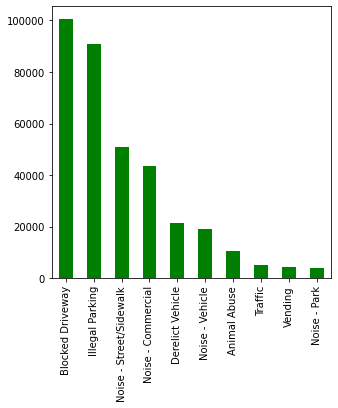

In [75]:
dataset['Complaint Type'].value_counts().head(10).plot(kind='bar',figsize=(5,5),color='g')

In [101]:
#To find major complaints 
majorcomplaints = dataset.groupby('Complaint Type')
sorted_complaints = majorcomplaints.size().sort_values(ascending=False)

In [81]:
sorted_complaints

Complaint Type
Blocked Driveway            100455
Illegal Parking              91057
Noise - Street/Sidewalk      50791
Noise - Commercial           43623
Derelict Vehicle             21419
Noise - Vehicle              19122
Animal Abuse                 10500
Traffic                       5161
Vending                       4162
Noise - Park                  3994
Drinking                      1399
Noise - House of Worship      1059
Posting Advertisement          678
Disorderly Youth               314
Graffiti                       157
dtype: int64

In [102]:
#top 10 complaints
sorted_complaints.head(10)

Complaint Type
Blocked Driveway           100881
Illegal Parking             92679
Noise - Street/Sidewalk     51692
Noise - Commercial          44109
Derelict Vehicle            21661
Noise - Vehicle             19352
Animal Abuse                10541
Traffic                      5198
Homeless Encampment          4879
Vending                      4192
dtype: int64

In [83]:
sorted_complaints = sorted_complaints.to_frame('count').reset_index()

In [103]:
sorted_complaints

Complaint Type
Blocked Driveway             100881
Illegal Parking               92679
Noise - Street/Sidewalk       51692
Noise - Commercial            44109
Derelict Vehicle              21661
Noise - Vehicle               19352
Animal Abuse                  10541
Traffic                        5198
Homeless Encampment            4879
Vending                        4192
Noise - Park                   4109
Drinking                       1409
Noise - House of Worship       1070
Posting Advertisement           681
Urinating in Public             641
Bike/Roller/Skate Chronic       478
Panhandling                     327
Disorderly Youth                315
Illegal Fireworks               172
Graffiti                        157
Agency Issues                     8
Squeegee                          4
Ferry Complaint                   2
Animal in a Park                  1
dtype: int64

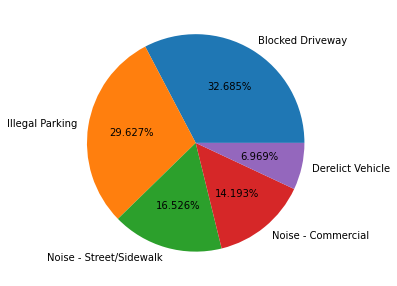

In [90]:
 sorted_complaint_type = sorted_complaints.head(5)
plt.figure(figsize=(7,5))
plt.pie(sorted_complaint_type['count'],
labels=sorted_complaint_type['Complaint Type'],
autopct="%2.3f%%")
plt.show()


In [104]:
dataset['Borough'].value_counts().head()


BROOKLYN         118864
QUEENS           100766
MANHATTAN         77462
BRONX             49169
STATEN ISLAND     15339
Name: Borough, dtype: int64

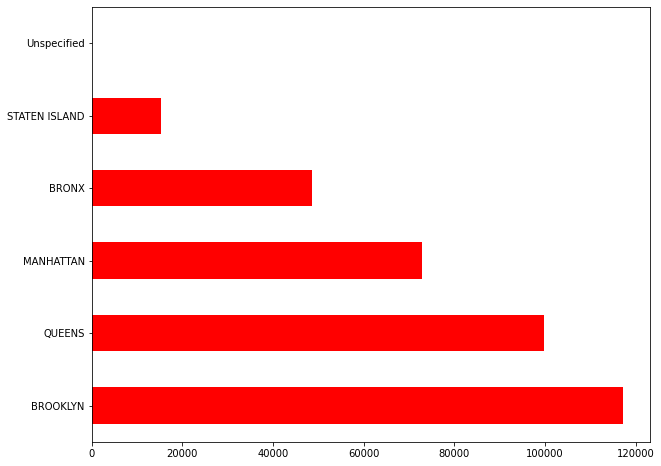

In [111]:
 plt.figure(figsize=(10,8))
dataset['Borough'].value_counts().plot(kind='barh',color='r')
plt.show()


In [105]:
#calculating percentage of each borough 

In [99]:
for x in dataset['Borough'].unique():print("Percentage of ",x,"Division is : ",round((dataset['Borough']==x).sum()/len(dataset)*100,3))


Percentage of  MANHATTAN Division is :  20.616
Percentage of  QUEENS Division is :  28.211
Percentage of  BRONX Division is :  13.744
Percentage of  BROOKLYN Division is :  33.137
Percentage of  STATEN ISLAND Division is :  4.292
Percentage of  Unspecified Division is :  0.0


In [106]:
for x in dataset['Borough'].unique():print(x)


MANHATTAN
QUEENS
BRONX
BROOKLYN
Unspecified
STATEN ISLAND


In [115]:
dataset.head()

,Unique Key,Created Date,Closed Date,Agency,Complaint Type,Descriptor,Location Type,Incident Zip,City,Status,Resolution Description,Borough,Latitude,Longitude
0,32310363,12/31/2015 11:59:45 PM,01/01/2016 12:55:15 AM,NYPD,Noise - Street/Sidewalk,Loud Music/Party,Street/Sidewalk,10034.0,NEW YORK,Closed,The Police Department responded and upon arriv...,MANHATTAN,40.865682,-73.923501
1,32309934,12/31/2015 11:59:44 PM,01/01/2016 01:26:57 AM,NYPD,Blocked Driveway,No Access,Street/Sidewalk,11105.0,ASTORIA,Closed,The Police Department responded to the complai...,QUEENS,40.775945,-73.915094
2,32309159,12/31/2015 11:59:29 PM,01/01/2016 04:51:03 AM,NYPD,Blocked Driveway,No Access,Street/Sidewalk,10458.0,BRONX,Closed,The Police Department responded and upon arriv...,BRONX,40.870325,-73.888525
3,32305098,12/31/2015 11:57:46 PM,01/01/2016 07:43:13 AM,NYPD,Illegal Parking,Commercial Overnight Parking,Street/Sidewalk,10461.0,BRONX,Closed,The Police Department responded to the complai...,BRONX,40.835994,-73.828379
4,32306529,12/31/2015 11:56:58 PM,01/01/2016 03:24:42 AM,NYPD,Illegal Parking,Blocked Sidewalk,Street/Sidewalk,11373.0,ELMHURST,Closed,The Police Department responded and upon arriv...,QUEENS,40.733060,-73.874170


In [107]:
dataset.dtypes

Unique Key                                int64
Created Date                     datetime64[ns]
Closed Date                      datetime64[ns]
Agency                                   object
Complaint Type                           object
Descriptor                               object
Location Type                            object
Incident Zip                            float64
Intersection Street 1                    object
Intersection Street 2                    object
City                                     object
Landmark                                 object
Status                                   object
Resolution Description                   object
Borough                                  object
School or Citywide Complaint            float64
Vehicle Type                            float64
Taxi Company Borough                    float64
Taxi Pick Up Location                   float64
Bridge Highway Name                      object
Bridge Highway Direction                

In [ ]:
#converting date time column as date time datatype

In [120]:
dataset['Created Date'] = pd.to_datetime(dataset['Created Date'])
dataset['Closed Date'] = pd.to_datetime(dataset['Closed Date'])

In [121]:
dataset.dtypes

Unique Key                                int64
Created Date                     datetime64[ns]
Closed Date                      datetime64[ns]
Agency                                   object
Complaint Type                           object
Descriptor                               object
Location Type                            object
Incident Zip                            float64
Intersection Street 1                    object
Intersection Street 2                    object
City                                     object
Landmark                                 object
Status                                   object
Resolution Description                   object
Borough                                  object
School or Citywide Complaint            float64
Vehicle Type                            float64
Taxi Company Borough                    float64
Taxi Pick Up Location                   float64
Bridge Highway Name                      object
Bridge Highway Direction                

In [122]:
dataset['Request_Closing_Time'] = dataset['Closed Date'] - dataset['Created Date']


In [123]:
dataset.head(2)


,Unique Key,Created Date,Closed Date,Agency,Complaint Type,Descriptor,Location Type,Incident Zip,Intersection Street 1,Intersection Street 2,...,Bridge Highway Name,Bridge Highway Direction,Road Ramp,Bridge Highway Segment,Garage Lot Name,Ferry Direction,Ferry Terminal Name,Latitude,Longitude,Request_Closing_Time
0,32310363,2015-12-31 23:59:45,2016-01-01 00:55:15,NYPD,Noise - Street/Sidewalk,Loud Music/Party,Street/Sidewalk,10034.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.865682,-73.923501,0 days 00:55:30
1,32309934,2015-12-31 23:59:44,2016-01-01 01:26:57,NYPD,Blocked Driveway,No Access,Street/Sidewalk,11105.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.775945,-73.915094,0 days 01:27:13


/usr/local/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Request_Closing_Time', ylabel='Density'>

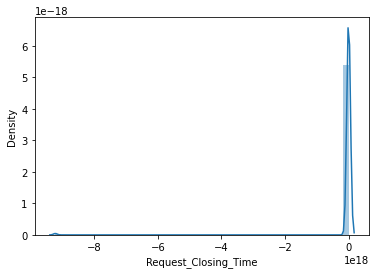

In [110]:
sns.distplot(dataset['Request_Closing_Time'])


In [47]:
dataset['Location Type'].unique()

array(['Street/Sidewalk', 'Club/Bar/Restaurant', 'Store/Commercial',
       'House of Worship', 'Residential Building/House',
       'Residential Building', 'Park/Playground', 'Vacant Lot',
       'House and Store', 'Highway', 'Commercial', 'Roadway Tunnel',
       'Subway Station', 'Parking Lot', 'Bridge', 'Terminal', nan,
       'Ferry', 'Park'], dtype=object)

In [111]:
dataset['Location Type'].value_counts()

Street/Sidewalk               301372
Store/Commercial               25217
Club/Bar/Restaurant            21527
Residential Building/House      8869
Park/Playground                 4871
House of Worship                1068
Residential Building             533
Highway                          265
House and Store                  245
Parking Lot                      167
Commercial                       108
Vacant Lot                        95
Roadway Tunnel                    43
Subway Station                    40
Bridge                             2
Park                               1
Terminal                           1
Ferry                              1
Name: Location Type, dtype: int64

In [80]:
dataset.head(1)

,Unique Key,Created Date,Closed Date,Agency,Complaint Type,Descriptor,Location Type,Incident Zip,Intersection Street 1,Intersection Street 2,...,Bridge Highway Name,Bridge Highway Direction,Road Ramp,Bridge Highway Segment,Garage Lot Name,Ferry Direction,Ferry Terminal Name,Latitude,Longitude,Request_Closing_Time
0,32310363,2015-12-31 23:59:45,2016-01-01 00:55:15,NYPD,Noise - Street/Sidewalk,Loud Music/Party,Street/Sidewalk,10034.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.865682,-73.923501,0 days 00:55:30
